In [16]:
# Styling notebook
#from IPython.core.display import HTML
#def css_styling():
    #styles = open("style.css", "r",encoding="utf-8").read()
    #return HTML(styles)
#css_styling()

In [17]:
import warnings
warnings.filterwarnings('ignore')

 # HW01: Predicción Ingresos Apple
 ## Modelos ETS y ARIMA
 ## Predicción Series Temporales
 ##


 # Introducción




In [18]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Read Data
ap_df = pd.read_csv('aapl_ok.csv',sep=';',decimal=",")
ap_df['fecha'] = pd.to_datetime(ap_df['fecha'],format="%m/%d/%Y")
ap_df = ap_df.set_index('fecha')
ap_df.head()

,Trimeste,Ingresos
fecha,,
1989-12-29,Q1 1990,1493.4
1990-03-30,Q2 1990,1346.2
1990-06-29,Q3 1990,1364.8
1990-09-28,Q4 1990,1354.1
1990-12-28,Q1 1991,1675.5


In [20]:
# Select Ingresos
ap_df=ap_df["Ingresos"]
ap_df.head()

fecha
1989-12-29    1493.4
1990-03-30    1346.2
1990-06-29    1364.8
1990-09-28    1354.1
1990-12-28    1675.5
Name: Ingresos, dtype: float64

In [21]:
# Resample to Quarterly I
ap_ts=ap_df.resample("q").last()
ap_ts.tail()

fecha
2020-06-30     59685.0
2020-09-30     64698.0
2020-12-31    111439.0
2021-03-31     89584.0
2021-06-30     81434.0
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [22]:
# Resample to Quarterly II
# SKtime format
ap_ts_q=ap_df.astype('float64').to_period('Q').sort_index()
ap_ts_q.tail()

fecha
2020Q2     59685.0
2020Q3     64698.0
2020Q4    111439.0
2021Q1     89584.0
2021Q2     81434.0
Freq: Q-DEC, Name: Ingresos, dtype: float64

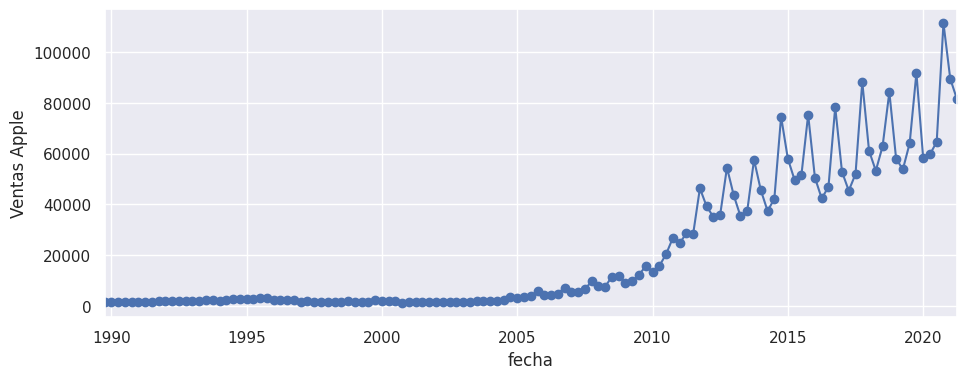

In [23]:
# Plot Data
# Use seaborn style defaults and set the default figure size

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = ap_ts_q.plot(marker='o', linestyle='-')
ax.set_ylabel('Ventas Apple');

In [24]:
# Plot Data
# Use Sktime style 
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

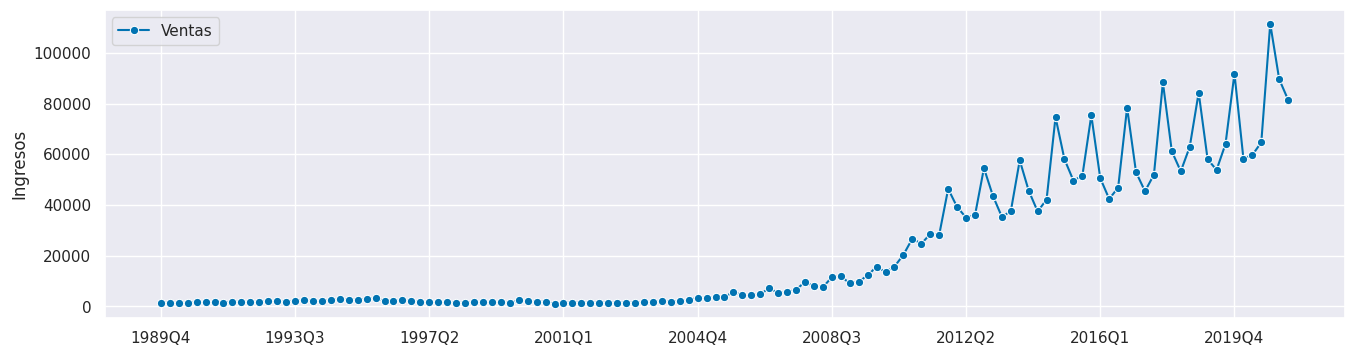

In [25]:
# Plot Data
plot_series(ap_ts_q, labels=["Ventas"])

In [26]:
# Import Stats Model 
# Using Quarte plot function
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional')

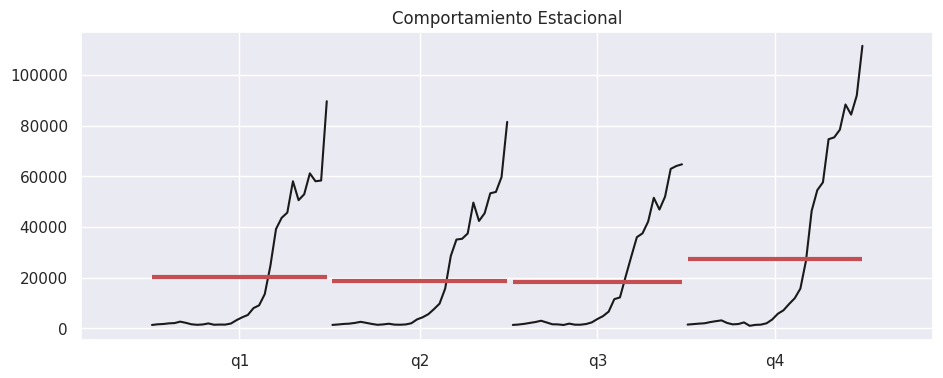

In [27]:
# Plot Quarterplot
ax = plt.gca()
sm.graphics.tsa.quarter_plot(ap_ts,ax=ax)
ax.set_title('Comportamiento Estacional')

existe una estacionalidad teniendo mas ventas e 4 trimestre


In [28]:
# Log Transformer Function
from sktime.transformations.series.boxcox import LogTransformer

In [29]:
# Apply Log Transformer

transformer = LogTransformer()
log_ap_ts= transformer.fit_transform(ap_ts_q)
log_ap_ts.tail()

2020Q2    10.996836
2020Q3    11.077486
2020Q4    11.621233
2021Q1    11.402932
2021Q2    11.307548
Freq: Q-DEC, Name: Ingresos, dtype: float64

el arima necesita transformacion logaritmica

In [30]:
# Sktime fucntions
# Forecast horizon and Split functions 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

119 8


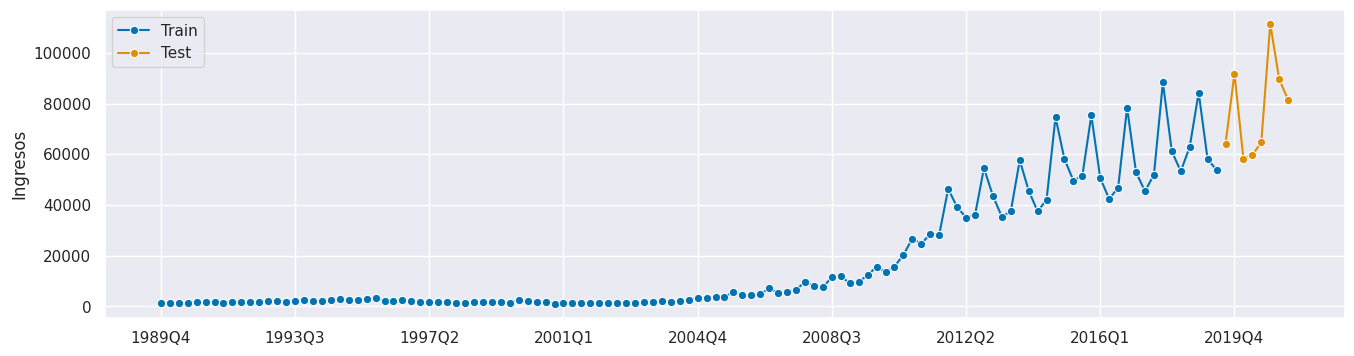

In [31]:
# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
n_test=8
n_forecast=8
y_train, y_test = temporal_train_test_split(y =ap_ts_q, test_size=8)
log_y_train, log_y_test = temporal_train_test_split(y =log_ap_ts, test_size=n_test)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])




# ETS MODELS

In [32]:
from sktime.forecasting.ets import AutoETS

In [33]:
# specifying forecasting horizon
fh = np.arange(len(y_test)) + 1

In [34]:
# specifying the forecasting algorithm
ap_autoETS_model = AutoETS(auto=True, sp=4, n_jobs=-1)

In [35]:
#  Auto ETS Model Estimation
ap_autoETS_model.fit(y_train)

AutoETS(auto=True, n_jobs=-1, sp=4)

In [36]:
#  Auto ETS Model Summary
print(ap_autoETS_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  119
Model:                       ETS(MAM)   Log Likelihood                -968.025
Date:                Tue, 24 Oct 2023   AIC                           1956.050
Time:                        15:59:46   BIC                           1983.841
Sample:                    12-31-1989   HQIC                          1967.335
                         - 06-30-2019   Scale                            0.018
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4225      0.055      7.739      0.000       0.316       0.530
smoothing_trend        0.1685      0.034      4.890      0.000       0.101       0.236
smoothing_seasonal  

In [37]:
#  Auto ETS Forecasting
ap_ETS_pred = ap_autoETS_model.predict(fh)
print(ap_ETS_pred)

2019Q3    58581.326742
2019Q4    85963.040159
2020Q1    59751.798679
2020Q2    53079.526151
2020Q3    58323.465808
2020Q4    85584.234646
2021Q1    59488.205472
2021Q2    52845.108937
Freq: Q-DEC, Name: Ingresos, dtype: float64


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

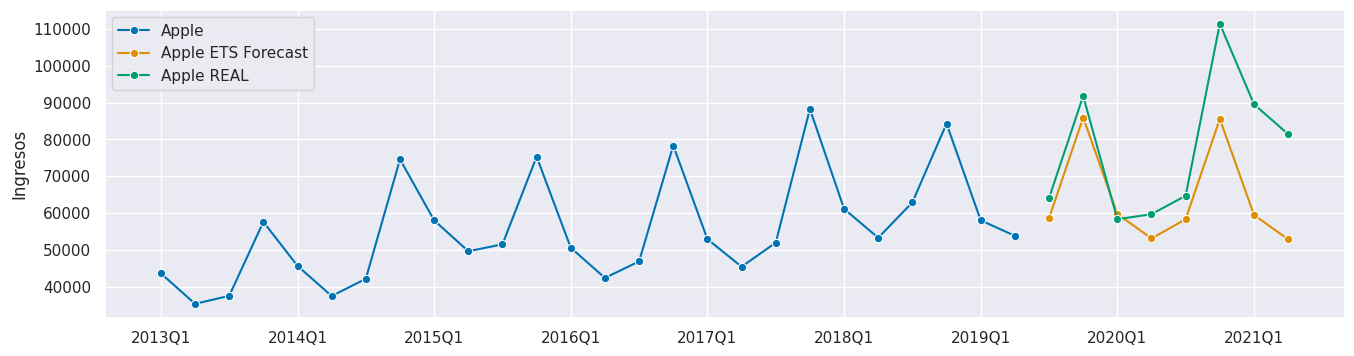

In [38]:
plot_series(y_train["2013":], ap_ETS_pred,y_test, labels=["Apple", "Apple ETS Forecast", "Apple REAL"])


# ayuda
# ap_autoETS_model._fitted_forecaster.fittedvalues.plot()
# ap_autoETS_model._fitted_forecaster.resid.plot()


# ARIMA

# ARIMA

In [39]:
# AutoArima Function
from sktime.forecasting.arima import AutoARIMA

In [40]:
#  Auto ARIMA Model
forecaster = AutoARIMA(sp=4,suppress_warnings=True)

In [41]:
#  Auto ARIMA Model Estimation
forecaster.fit(log_y_train)

AutoARIMA(sp=4, suppress_warnings=True)

In [42]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  119
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 4)   Log Likelihood                  58.362
Date:                           Tue, 24 Oct 2023   AIC                           -108.724
Time:                                   16:00:03   BIC                            -97.642
Sample:                               12-31-1989   HQIC                          -104.224
                                    - 06-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3363      0.089     -3.795      0.000      -0.510      -0.163
ar.S.L4        0.9156      0.062     14.822

In [43]:
#  Auto ARIMA Forecast (log)
log_y_pred = forecaster.predict(fh)
log_y_pred

2019Q3    11.005156
2019Q4    11.335685
2020Q1    11.027218
2020Q2    10.934801
2020Q3    11.039462
2020Q4    11.342086
2021Q1    11.059661
2021Q2    10.975046
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [44]:
#  Auto ARIMA Forecast (original)
ap_ARIMA_pred=np.exp(log_y_pred)
ap_ARIMA_pred

2019Q3    60183.674939
2019Q4    83757.822329
2020Q1    61526.178912
2020Q2    56094.939194
2020Q3    62284.140153
2020Q4    84295.715654
2021Q1    63555.016644
2021Q2    58398.541302
Freq: Q-DEC, Name: Ingresos, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

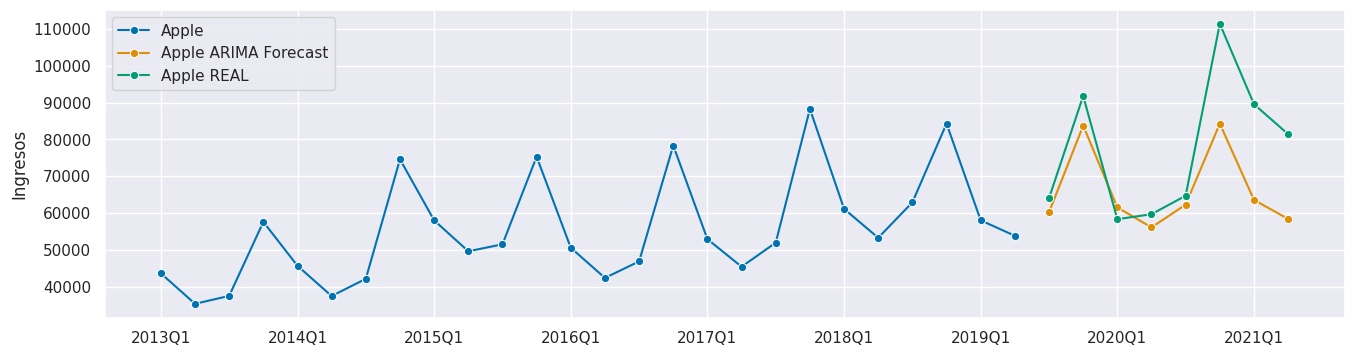

In [45]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2013 -2021
plot_series(y_train["2013":], ap_ARIMA_pred,y_test, labels=["Apple", "Apple ARIMA Forecast", "Apple REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

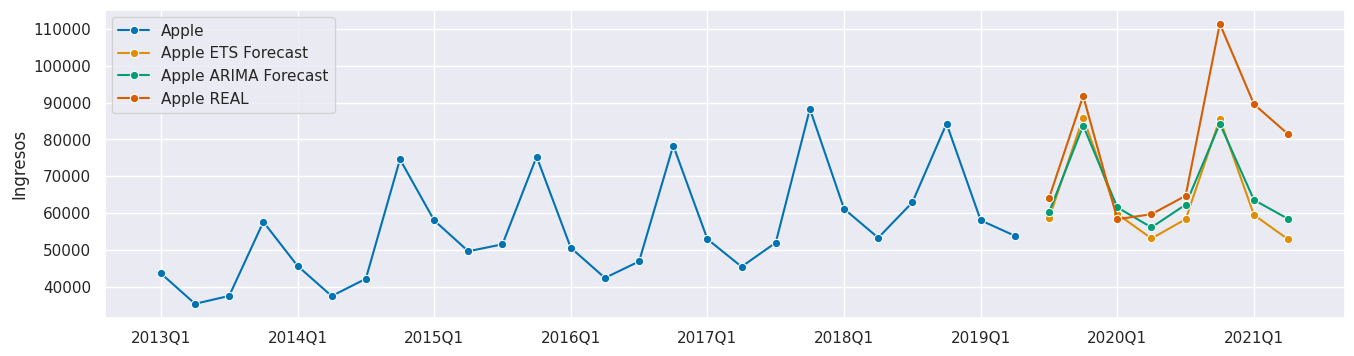

In [46]:
# Compare ETS & ARIMA
plot_series(y_train["2013":], ap_ETS_pred,ap_ARIMA_pred,y_test, labels=["Apple", "Apple ETS Forecast","Apple ARIMA Forecast", "Apple REAL"])

In [47]:
prediccion=pd.concat([y_test,ap_ETS_pred,ap_ARIMA_pred],axis=1)
prediccion.columns=["APPLE", 'ETS','ARIMA']
prediccion

,APPLE,ETS,ARIMA
2019Q3,64040.0,58581.326742,60183.674939
2019Q4,91819.0,85963.040159,83757.822329
2020Q1,58313.0,59751.798679,61526.178912
2020Q2,59685.0,53079.526151,56094.939194
2020Q3,64698.0,58323.465808,62284.140153
2020Q4,111439.0,85584.234646,84295.715654
2021Q1,89584.0,59488.205472,63555.016644
2021Q2,81434.0,52845.108937,58398.541302


In [48]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [49]:
# Forecast Accuracy
# MAPE
# ETS
mean_absolute_percentage_error(y_test, ap_ETS_pred)

0.16273953082780607

In [50]:
# Forecast Accuracy
# MAPE
# ARIMA
mean_absolute_percentage_error(y_test, ap_ARIMA_pred)

0.13969639733058992

In [51]:
# Forecast Accuracy
#Mean Squared Error
# ETS
rmse = MeanSquaredError(square_root=True)
rmse(y_test, ap_ETS_pred)

17825.462560550983

In [52]:
# Forecast Accuracy
#Mean Squared Error
# ARIMA
rmse = MeanSquaredError(square_root=True)
rmse(y_test, ap_ARIMA_pred)

######################
# Forecast 2021 & 2022
######################

16022.608324659994

# Predicción fuera de la muestra (6 trimestres)

In [53]:
# ETS Model
fh = np.arange(1, 7)
ap_ETS_model = AutoETS(auto=True, sp=4, n_jobs=-1)
ap_ETS_model.fit(ap_ts_q)
print(ap_ETS_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  127
Model:                       ETS(MAM)   Log Likelihood               -1052.310
Date:                Tue, 24 Oct 2023   AIC                           2124.620
Time:                        16:00:04   BIC                           2153.062
Sample:                    12-31-1989   HQIC                          2136.176
                         - 06-30-2021   Scale                            0.018
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4303      0.055      7.816      0.000       0.322       0.538
smoothing_trend        0.1718      0.035      4.969      0.000       0.104       0.240
smoothing_seasonal  

In [54]:
# ETS Forescat
ap_ETS_pred = ap_ETS_model.predict(fh)
print(ap_ETS_pred)

2021Q3     94928.198386
2021Q4    153907.759505
2022Q1    112068.409844
2022Q2    104446.057804
2022Q3    120404.562349
2022Q4    192615.706400
Freq: Q-DEC, Name: Ingresos, dtype: float64


In [55]:
# ETS Forescat
ap_ETS_pred = ap_ETS_model.predict(fh)
print(ap_ETS_pred)

2021Q3     94928.198386
2021Q4    153907.759505
2022Q1    112068.409844
2022Q2    104446.057804
2022Q3    120404.562349
2022Q4    192615.706400
Freq: Q-DEC, Name: Ingresos, dtype: float64


no hay quien se crea que las ventas vayan a duplicarse tanto. esto es lo que hace el salto que hay en el ultimo trimestre de 2020 que el modelo ets no predecia tanto
El arima no se va tanto hacia arriba tan explosivo (se ve en un grafico mas abajo comparando predicciones de lso dos) y ha cambiado de modelo a 2,1,1

In [56]:
# ARIMA MODEL
ap_ARIMA_Model = AutoARIMA(sp=4,suppress_warnings=True)
ap_ARIMA_Model.fit(log_ap_ts)
print(ap_ARIMA_Model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  127
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 4)   Log Likelihood                  64.270
Date:                             Tue, 24 Oct 2023   AIC                           -118.539
Time:                                     16:00:21   BIC                           -104.358
Sample:                                 12-31-1989   HQIC                          -112.778
                                      - 06-30-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3231      0.079     -4.096      0.000      -0.478      -0.168
ar.L2         -0.1575      

In [57]:
#  Auto ARIMA Forecast (log)
log_ARIMA_pred = ap_ARIMA_Model.predict(fh)
ap_ARIMA_pred=np.exp(log_ARIMA_pred)
ap_ARIMA_pred

2021Q3     89895.159267
2021Q4    134667.710973
2022Q1    102010.214502
2022Q2     95842.759213
2022Q3    105437.402726
2022Q4    153160.635738
Freq: Q-DEC, Name: Ingresos, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

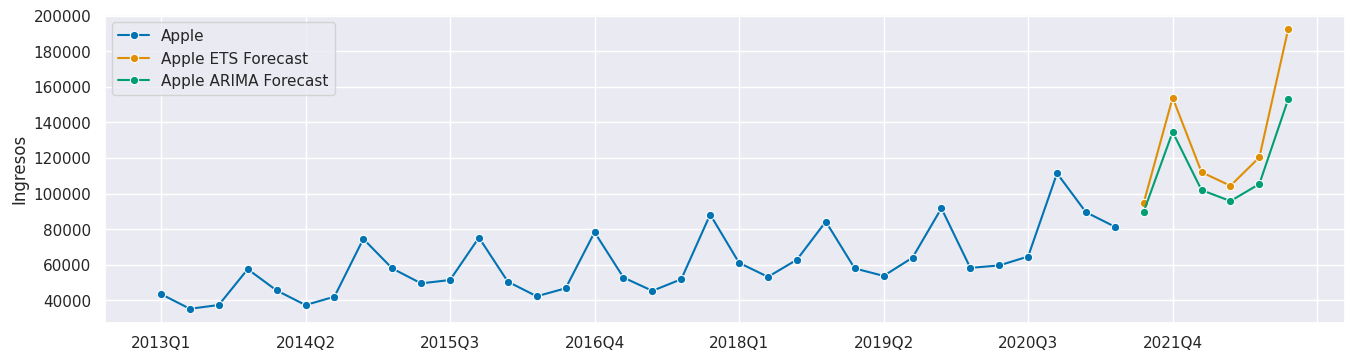

In [58]:
# Comprare ETS & ARIMA
plot_series(ap_ts_q["2013":], ap_ETS_pred,ap_ARIMA_pred, labels=["Apple", "Apple ETS Forecast","Apple ARIMA Forecast"])

In [59]:
prediccion=pd.concat([y_test,ap_ETS_pred,ap_ARIMA_pred],axis=1)
prediccion.columns=["APPLE", 'ETS','ARIMA']
prediccion

,APPLE,ETS,ARIMA
2019Q3,64040.0,NaN,NaN
2019Q4,91819.0,NaN,NaN
2020Q1,58313.0,NaN,NaN
2020Q2,59685.0,NaN,NaN
2020Q3,64698.0,NaN,NaN
2020Q4,111439.0,NaN,NaN
2021Q1,89584.0,NaN,NaN
2021Q2,81434.0,NaN,NaN
2021Q3,NaN,94928.198386,89895.159267
2021Q4,NaN,153907.759505,134667.710973


In [60]:
pd.concat([ap_ETS_pred,ap_ARIMA_pred],axis=1).rename(columns={0 : 'ETS',1 : 'ARIMA'})

,Ingresos,Ingresos
2021Q3,94928.198386,89895.159267
2021Q4,153907.759505,134667.710973
2022Q1,112068.409844,102010.214502
2022Q2,104446.057804,95842.759213
2022Q3,120404.562349,105437.402726
2022Q4,192615.706400,153160.635738


 # Cuestiones
 ¿Los ingresos de Apple son estacionarios? ¿En media? ¿En varianza?  
 ¿Cuál es su tendencia? ¿y su componente estacional?  
 ¿Cuales son las ventas anuales de Apple?  
 ¿Cuales son los crecimientos anuales de los ingresos?  
 ¿Qué modelo predice mejor?  
 ¿Existe efecto COVID? Cuantificar.  
 ¿Cuales son las ventas acumuladas para el año 2021? ¿Y para el 2022?  
 ¿Son creíbles las predicciones del Barclays? 

 # Cuestiones
 ¿Los ingresos de Apple son estacionarios? ¿En media? ¿En varianza?
 No y No

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

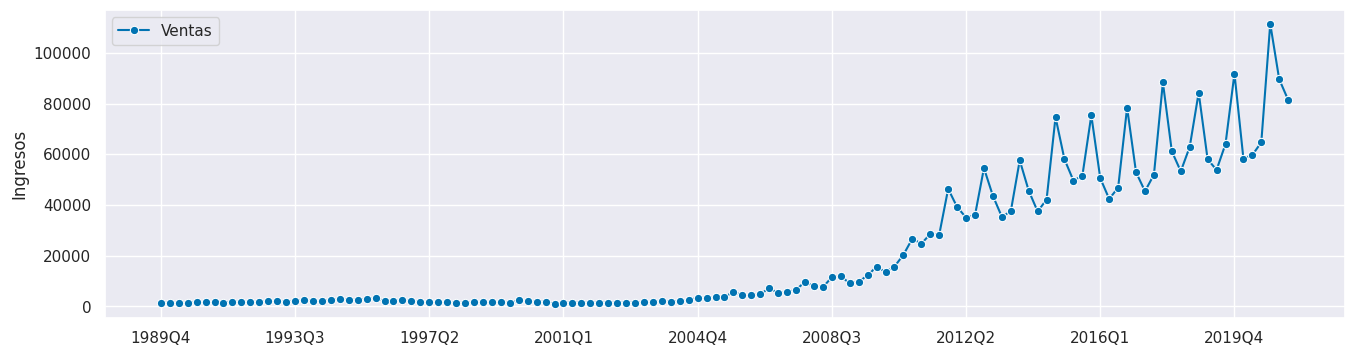

In [61]:
#
plot_series(ap_ts_q, labels=["Ventas"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

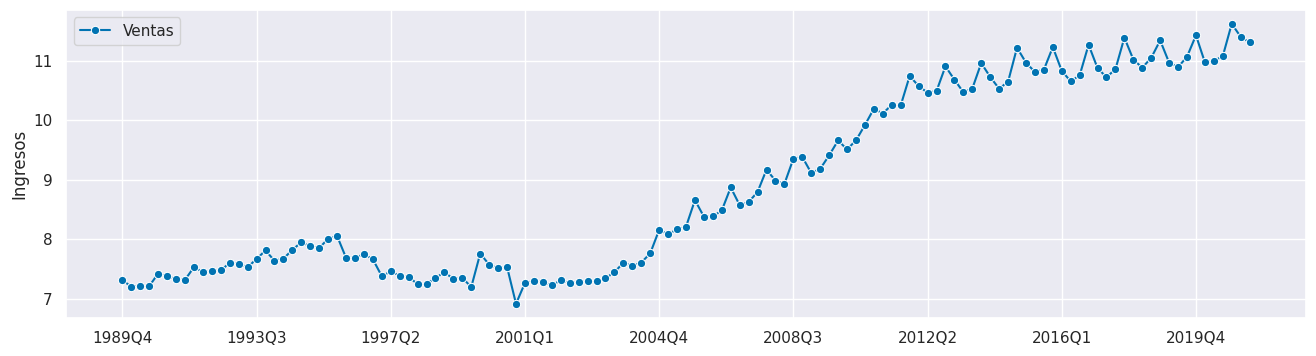

In [62]:
plot_series(log_ap_ts, labels=["Ventas"])

 # Cuestiones
 ¿Cuál es su tendencia? ¿y su componente estacional?

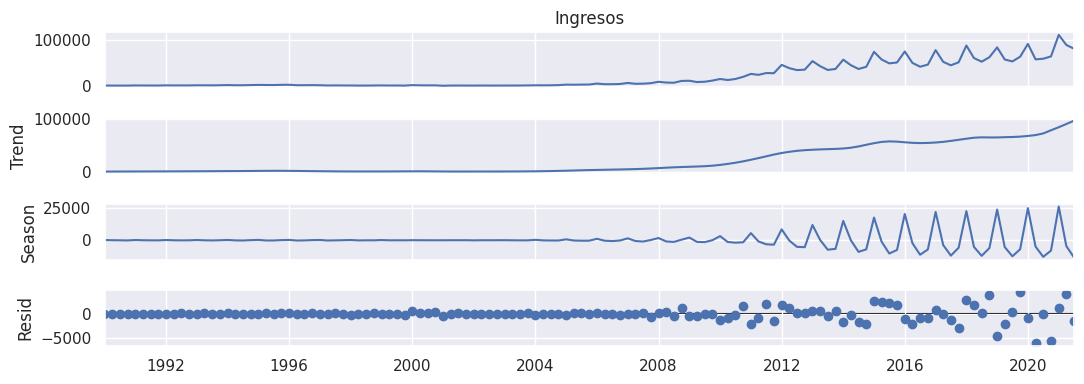

In [63]:
# modelo stl para estimar tendencia y componente estacional
from statsmodels.tsa.seasonal import STL
res = STL(ap_ts).fit()
res.plot()
plt.show()

 # Cuestiones
 ¿Cuales son las ventas anuales de Apple?

In [64]:
ap_year=ap_ts_q.resample('A').sum()
ap_year.tail()

2017    238536.0
2018    261612.0
2019    267683.0
2020    294135.0
2021    171018.0
Freq: A-DEC, Name: Ingresos, dtype: float64

 # Cuestiones
 ¿Cuales son las ventas anuales FISCALES de Apple?

In [65]:
ap_year_f=ap_ts_q.resample('A-SEP').sum()
ap_year_f.tail()

2017    228594.0
2018    265595.0
2019    260174.0
2020    274515.0
2021    282457.0
Freq: A-SEP, Name: Ingresos, dtype: float64

porque el año fiscal de apple empieza en septiembre

 # Cuestiones
 ¿Cuales son los crecimientos anuales de los ingresos?

In [66]:
ap_year.pct_change()

1989         NaN
1990    2.843980
1991    0.131589
1992    0.112100
1993    0.169071
1994    0.130991
1995    0.191177
1996   -0.225347
1997   -0.259133
1998   -0.069985
1999    0.114276
2000   -0.017733
2001   -0.137807
2002    0.018845
2003    0.154479
2004    0.448301
2005    0.658302
2006    0.277888
2007    0.308086
2008    0.438902
2009    0.199456
2010    0.633189
2011    0.675878
2012    0.288217
2013    0.056501
2014    0.148329
2015    0.173373
2016   -0.069621
2017    0.093610
2018    0.096740
2019    0.023206
2020    0.098818
2021   -0.418573
Freq: A-DEC, Name: Ingresos, dtype: float64

In [67]:
ap_year_f.pct_change()

1990         NaN
1991    0.135000
1992    0.123254
1993    0.125661
1994    0.151912
1995    0.203857
1996   -0.111101
1997   -0.279874
1998   -0.160994
1999    0.032486
2000    0.301435
2001   -0.328197
2002    0.070669
2003    0.080982
2004    0.333817
2005    0.682691
2006    0.386476
2007    0.272483
2008    0.491944
2009    0.170062
2010    0.520219
2011    0.659624
2012    0.445815
2013    0.092021
2014    0.069540
2015    0.278563
2016   -0.079687
2017    0.062778
2018    0.161863
2019   -0.020411
2020    0.055121
2021    0.028931
Freq: A-SEP, Name: Ingresos, dtype: float64

 # Cuestiones
 ¿Qué modelo predice mejor?

 # Cuestiones
 ¿Existe efecto COVID? Cuantificar.

 # Cuestiones
 ¿Cuales son las ventas acumuladas para el año 2021? ¿Y para el 2022?

In [68]:
pd.concat([ap_ts_q,ap_ETS_pred],axis=0).resample('A').sum()['2021':]

2021    419853.957891
2022    529534.736398
Freq: A-DEC, Name: Ingresos, dtype: float64

In [69]:
pd.concat([ap_ts_q,ap_ARIMA_pred],axis=0).resample('A').sum()['2021':]

2021    395580.870239
2022    456451.012178
Freq: A-DEC, Name: Ingresos, dtype: float64

 # Cuestiones
 ¿Son creíbles las predicciones del Barclays?

In [70]:
pd.concat([ap_ts_q,ap_ETS_pred],axis=0).resample('A-SEP').sum()['2021':]

2021    377385.198386
2022    490826.789502
2023    192615.706400
Freq: A-SEP, Name: Ingresos, dtype: float64

In [71]:
pd.concat([ap_ts_q,ap_ARIMA_pred],axis=0).resample('A-SEP').sum()['2021':]

2021    372352.159267
2022    437958.087413
2023    153160.635738
Freq: A-SEP, Name: Ingresos, dtype: float64

## INTENTA QUITAR DE LA PREDICCION LOS ULTIMOS 3 DATOS PARA QUE NO DE ESE SALTO HACIA ARRIBA QUE NOS JODA LAS PREDICCIONES

TAMPOCO NOS SOLUCIONA PORQUE EN VEZ DE PASARNOS DE LARGO NOS QUEDAMOS MUY CORTOS EN LAS ESTIMACIONES (EN EL ETS MENOS QUE EN EL ARIMA)

In [ ]:
# specifying forecasting horizon
fh = np.arange(len(y_test)) + 7

HACER UNA TENDENCIA AMORTIGUADA PARA VER SI ME SUAVIZA LAS PREDICCIONES DEL ETS Y QUE EL SALTO NO SEA TAN GRANDE 